In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import LinearRegression


%matplotlib inline

## Problem 1 (20pt)

**Correlations.**

•When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column.  For a warm up, do this: Look at the data in DF1 in Lab2.zip.  Which columns are (pairwise) correlated?  Figure out how to do this with Pandas, and also how to do this with Seaborn.

•Compute the covariance matrix of the data.  Write the explicit expression for what this is,  and  then  use  any  command  you  like  (e.g.,  np.cov)  to  compute  the  4×4  matrix. Explain why the numbers that you get fit with the plots you got.

•The  above  problem  in  reverse.   Generate  a  zero-mean  multivariate  Gaussian  randomvariable in 3 dimensions, $Z= (X1,X2,X3)$ so that $(X1,X2)$ and $(X1,X3)$ are uncorre-lated, but $(X2,X3)$ are correlated.  Specifically:  choose a covariance matrix that has the above correlations structure, and write this down.  Then find a way to generate samples from  this  Gaussian.   Choose  one  of  the  non-zero  covariance  terms  ($C_{ij}$,  if $C$ denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales.  The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

Pandas Covariance Scatter Plot


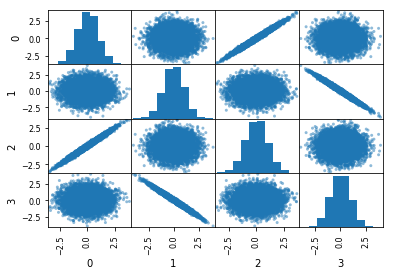

Seaborn Covariance Scatter Plot


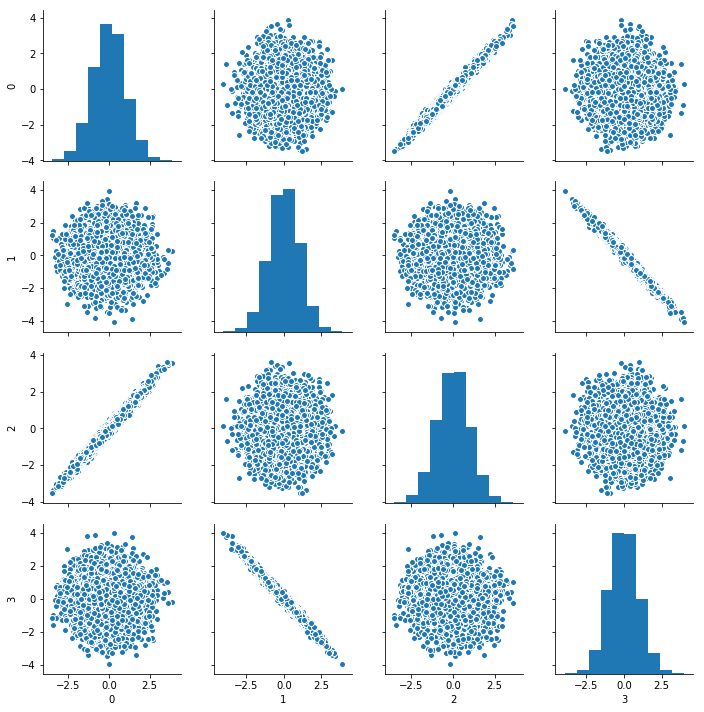

In [2]:
df = pd.read_csv('./DF1', sep=',', header=0, index_col=0)

print "Pandas Covariance Scatter Plot"
pd.plotting.scatter_matrix(df)
plt.show()

print "Seaborn Covariance Scatter Plot"
sns.pairplot(df)
plt.show()

In [3]:
cov = np.cov(df, rowvar=False)      
print "Covariance Matrix:\n", cov

Covariance Matrix:
[[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


The covariances along the diagonal tend towards 1 as obviously there is going to be extremely high covariance between a variable and itself. As for the other high covariances, we see in the plots, that between those respective pairs of variables there exists a very close relation between the variance of both variables. This leads to very closely grouped points along a specific negative or positive axis depending on the sign of the covariance. As far the covariances with rather small values, there tends to be no relation between the spread of those variables and we just get random clusters of points in the plots.

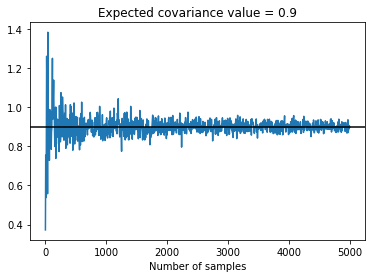

In [4]:
covMatrix = [[1, 0, 0], [0, 1, 0.9], [0, 0.9, 1]]
mu = [0, 0, 0]

cov_x = range(2, 5000, 5)
cov_y =[np.cov(np.random.multivariate_normal(mu, size=n, cov=covMatrix), rowvar=False)[1][2] for n in cov_x]

plt.title('Expected covariance value = 0.9')
plt.xlabel('Number of samples')
plt.plot(cov_x, cov_y)
plt.axhline(0.9, 0, 5000, color='k')
plt.show()

## Problem 2

**Outliers.**

Consider the two-dimensional data in DF2 in Lab2.zip.  Look at a scatter plot of the data.  It contains two points that look like potential outliers.  Which one is “more” outlying?  Propose a transformation of the data that makes it clear that the point at $(−1,1)$ is  more  outlying  than  the  point  at  $(5.5,5)$,  even  though  the  latter  point  is “farther  away” from the nearest points.  Plot the data again after performing this transformation.  Provide discussion as appropriate to justify your choice of transformation. *Hint:  if $y$ comes  from  a standard  Gaussian  in  two  dimensions  (i.e.,  with  covariance  equal  to  the  two  by  two  identity matrix), and $$Q=\left(\begin{array}{cc}2 & \frac{1}{2}\\\frac{1}{2} & 2\end{array}\right)$$, what is the covariance matrix of the random variable $z=Qy$?  If you are given $z$, how would you create a random Gaussian vector with covariance equal to the identity, using $z$?*

[[0.75743013 0.65646581]
 [0.65646581 0.75710783]]
New position of (-1, 1): [[-0.99768418]
 [13.99393883]]
New position of (5.5, 5): [[ 5.48726302]
 [-3.1160407 ]]


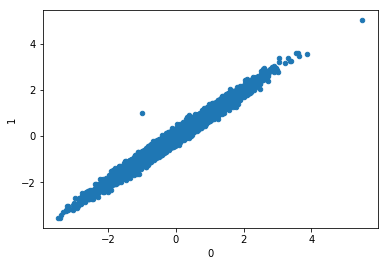

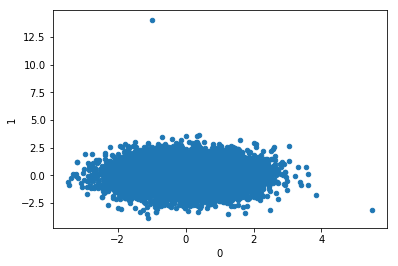

In [5]:
df = pd.read_table("./DF2", sep=',', index_col=0)
df.plot(x=0, y=1, kind="scatter", style="b^")

cov = np.cov(df, rowvar=False)
print(sc.linalg.sqrtm(cov))
invQ = np.linalg.inv(np.linalg.cholesky(cov))

# Transpose due to matrix ordering.
newData = df.dot(np.transpose(invQ))
newData.plot(x=0, y=1, kind="scatter", style="b^")

print('New position of (-1, 1): {}'.format(np.dot(invQ, [[-1], [1]])))
print('New position of (5.5, 5): {}'.format(np.dot(invQ, [[5.5], [5]])))

If $y$ is assumed to be a normal bivariate Gaussian vector when $z$ was created, we can reverse engineer $y$ by getting rid of the $Q$ on the right hand side of $z=Qy$. This can be done by multiplying both sides of the equation by $Q^{-1}$.

Since $z$ is $0$ mean, we calculate the covariance matrix of $z$ as $\Sigma_z = E(z z^T) = E(Q y y^T Q^T) = Q E(y y^T) Q^T = Q Q^T$.

To calculate $Q$, we need to factorize the covariance matrix. One way to do this is the Cholesky decomposition.

After the transformation, we can now say that a point $x$ with a larger distance from 0 (i.e., $\|x \|_2$) is less likely to appear.

## Problem 3 (20pt)

**Even More Standard Error**

(This  is  to  be  completed  only  after  you’ve  completed  the last written exercise below).  In one of the written exercises below, you derive an expression for what is called the Standard Error:  where $β$ denotes the “truth,” $\hat{β}$ denotes the value we compute using least squares linear regression, and $Z$ and $e$ are as in the exercise below, you find: $$\hat{β}−β=Ze$$.If we know the distribution of the noise (the distribution generating the noise vectors, $e_{i}$),then we know the distribution for the error, ($\hat{β}−β$).  This allows us to answer the question given in class:  if we solve a regression and obtain value $\hat{β}$, how can we tell if it is statistically significant?  The answer is:  we compare the size of $\hat{β}$ to the spread introduced by the noise (i.e., the standard error), and we ask:  what is the likelihood that the true $β= 0$, and what we observed was purely due to the noise. If the noise is Gaussian (normal), i.e., $e_{i}\sim N(0,σ^2)$, and if the values of the $x_{i}$ are normalized, then  we  expect  error  of  the  size $\frac{σ}{\sqrt{n}}$,  as  this  is  roughly  the  standard  deviation  of  the expression for the error that you derive above.  This means:  if you have twice the data points,you should expect the error to be reduced by about $1.4$ (the formula says that the standard deviation of the error would decrease by a factor of $\frac{1}{\sqrt{2}}$).

Compute this empirically, as follows:  We will generate data for a regression problem, solve it, and see what the error is:  Generate data as I did in the example from class: $x_{i}\sim N(0,1)$, $e_{i}\sim N(0,1)$. Generate $y$ by $y_{i}=β_{0}+x_{i}β+e_{i}$,  where $β_{0}=−3$  and $β = 0$. *Note  that since $β = 0$, this means that $y$ and $x$ are unrelated! The question we are exploring here is as follows: when  we  solve  a  regression  problem,  we  are  not  going  to  find $\hat{β}= 0$ –  we  will  find that $\hat{β}$ takes some other values, hopefully close to zero.  How do we know if the value of $\hat{β}$ we get is statistically meaningful?*

  •By creating fresh data and each time computing $\hat{β}$ and recording $\hat{β}−β$, compute the empirical standard deviation of the error for $n= 150$ (the number we used in class).  In class,  in the exercise where I tried to find a linear regression of $y$ vs. noise,  we found $\hat{β}=−0.15$.  Given your empirical computation of the standard deviation of the error, how significant is the value $−0.15$?

  •Now repeat the above experiment for different values of $n$.  Plot these values, and on the same plot, plot $\frac{1}{\sqrt{n}}$.  How is the fit?

In [6]:
beta_0 = -3

def getStandardErrors(n):
    stdErrors = []
    #repeat the experiment 1000 times to get error bars
    for i in range(0, 1000):
        #create one sample set of n samples
        beta = np.zeros(n)
        x = np.random.normal(size=n)
        e = np.random.normal(size=n)
        y = beta_0 + np.dot(x.T,beta) + e

        #beta hat = beta + Ze, so beta hat - beta = Ze = (x^T * e)/(x^T * x)
        #derived in the second written problem
        stdErrors.append(x.T.dot(e) / x.T.dot(x))
    return np.std(stdErrors)
    
    
print "Emperical Standard Deviation of Errors (n=150): ", getStandardErrors(150)

Emperical Standard Deviation of Errors (n=150):  0.08349470762407907


Since the value found for $\hat{\beta}$ is almost two standard deviations away from the null value of 0, it is somewhat significant, however we would not be able to reject the null hypothesis under the standard $p < 0.05$ rule.

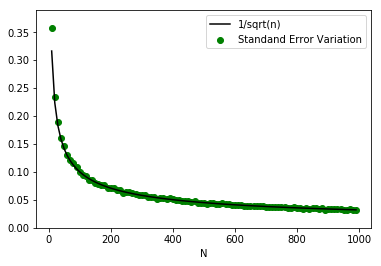

In [7]:
#create data for plotting 1/sqrt(n)
sizes = range(10, 1000, 10)
n = list(map(lambda x: 1 / np.sqrt(x), sizes))

#find the empircal standard deviation of errors (Bhat - B) for varying values of n
stdErrors = []
for i in sizes:
    stdErrors.append(getStandardErrors(i)) 

#plot the data
plt.scatter(sizes, stdErrors, color='green', label='Standand Error Variation')
plt.xlabel("N")
plt.plot(sizes, n, color='black', label='1/sqrt(n)')
plt.legend()
plt.show()

As can be seen, the fit of the standard error variation to the $\frac{1}{\sqrt{n}}$ curve is almost exact. Since we take so many samples for each value of N, we can pretty accuractly predict the true standard error.

## Problem 4

**Names and Frequencies.**

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

•Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX.
 
•Write a program that on input Name returns the frequency for men and women of the name Name.
 
•It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency.

•Find all the names that used to be more popular for one gender, but then became more popular for another gender.

•(Optional) Find something cool about this data set.

In [5]:
#create pandas dataframe from one .txt file
def getData(year):
    #read the .txt file into a dataframe to work with
    return pd.read_csv("./Names/yob%s.txt" % year ,names = ["Name", "Gender", "Number"])

#find the k largest names by year
def top_k_by_year(k, year):
    data = getData(year)
    return data.nlargest(k, 'Number')['Name']
    
#find the number of occurences of a particular name in a certain year for both males and females
def name_frequency(name, year):
    data = getData(year)
    
    #find all the people in a particular year with the same name and each gender
    male_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'M')]
    female_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'F')]
    
    male_count = male_result.values[0] if not male_result.empty else 0
    female_count = female_result.values[0] if not female_result.empty else 0
    return male_count, female_count
    
#find the frequency of a name, relative to the total number of different names that year
def relative_frequency(name, year):
    data = getData(year)
    male_name_count, female_name_count = name_frequency(name, year)
    
    #sum up the number of names in a year, and then return the relative frequencies per gender
    total = float(np.sum(data,axis=0)[2])
    return male_name_count / total, female_name_count / total
    
#find the frequency of a name over the course of all the records
def get_every_year_frequency(name, relative=False):
    data = []
    for year in range(1880, 2016):
        #get data
        df = getData(year)
        df['Year'] = year
        if not relative:
            #if not relative, add new Frequency column with absolute frequency values
            male_freq, female_freq = name_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        else:
            #if not relative, add new Frequency column with relative frequency values
            male_freq, female_freq = relative_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        #add yearly data to collection of data using only the year, name, frequency, and gender columns
        data.append(df.loc[(df['Name'] == name) & (df['Year'] == year), ('Year', 'Name', 'Frequency', 'Gender')])
    #create one dataframe from the array of smaller dataframes
    data = pd.concat(data)
    return data

#plot the frequency of a name over time
def plot_frequency_data(data, name, relative=False):
    sns.set_style('whitegrid')
    f = plt.figure(figsize=(18, 8))
        
    sns.pointplot(data=data, x='Year', y='Frequency', hue='Gender')
    sns.despine()
    f.tight_layout()

    plt.title('Frequency of %s throughout US population' % name)
    if not relative:
        plt.ylabel('Absolute Frequency')
    else:
        plt.ylabel('Relative Frequency (% of population)')

    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()
    
#find which names started off being more popular for one gender and later switched to another gender
def find_more_popular():
    data = []
    for year in range(1880,2016):
        df = getData(year)
        df['Year'] = year
        data.append(df)
        
    data = pd.concat(data)
    
    #create new diff column with number of names positive for males and negative for females
    data["diff"] = data["Gender"].map({'M':1,'F':-1})
    data["diff"] = data["diff"] * data["Number"]
    print("male/F counts:")
    print(data.head())
    
    #group data by name and year, sum up the columns, and drop the year column
    data = data.groupby(["Name","Year"]).sum()
    print("group on name,yr:")
    print(data.head())
    data = data.reset_index().drop('Year',1)
    print("yr drop:")
    print(data.head())
    
    #for each name, create new columns with the minimum value (i.e. females) and maximum value (i.e. males) 
    data = data.groupby('Name').agg({'diff':['min','max']})
    print("min/max:")
    print(data.head())
    data.columns = ['min', 'max']
    print("min/max:")
    print(data.head())
    
    #create new switch column which identifies if a name switched from positive to negative or vice verse
    data['switch'] = (np.sign(data["min"] * data['max']) == -1)
    print("switch column:")
    print(data.head())
    
    #Remove data that didn't switch gender
    data = data[data['switch']].reset_index()
    print("switch reset:")
    print(data.head())
    
    return data['Name'].values

In [8]:
name_frequency('Carol', 2015)

(0, 117)

In [7]:
print(top_k_by_year(10, 2015).to_string(index=False))

Emma
  Olivia
    Noah
    Liam
  Sophia
   Mason
     Ava
   Jacob
 William
Isabella


In [9]:
relative_frequency('Carol', 2015)

(0.0, 3.189590050441867e-05)

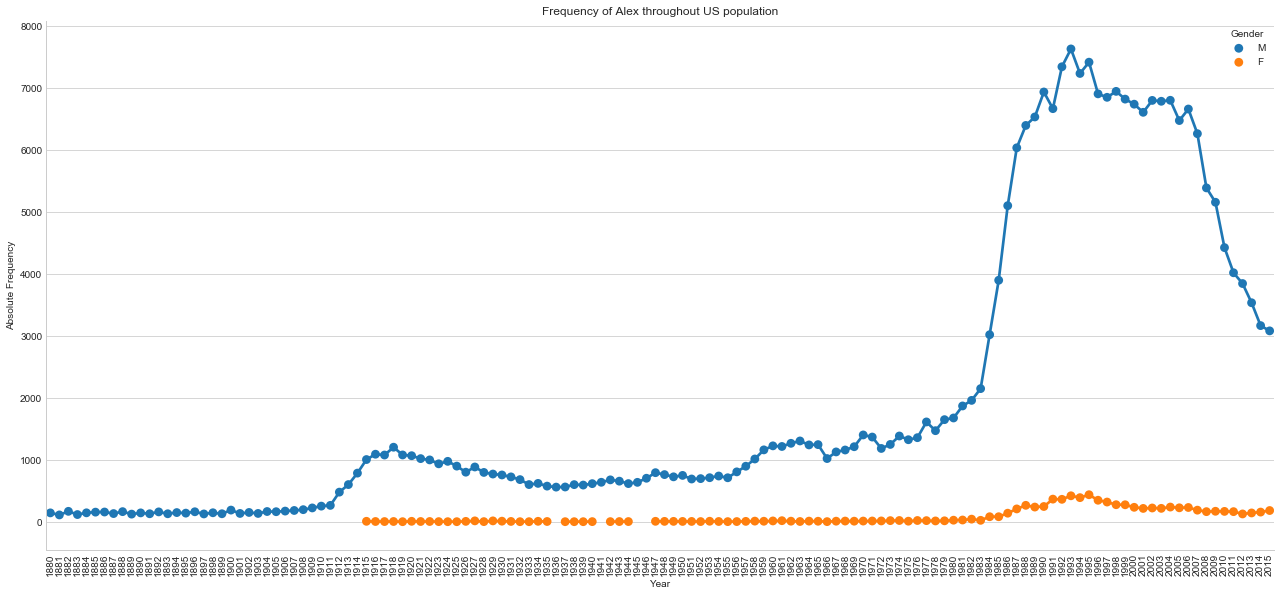

In [10]:
name = 'Alex'
data = get_every_year_frequency(name)
plot_frequency_data(data, name)

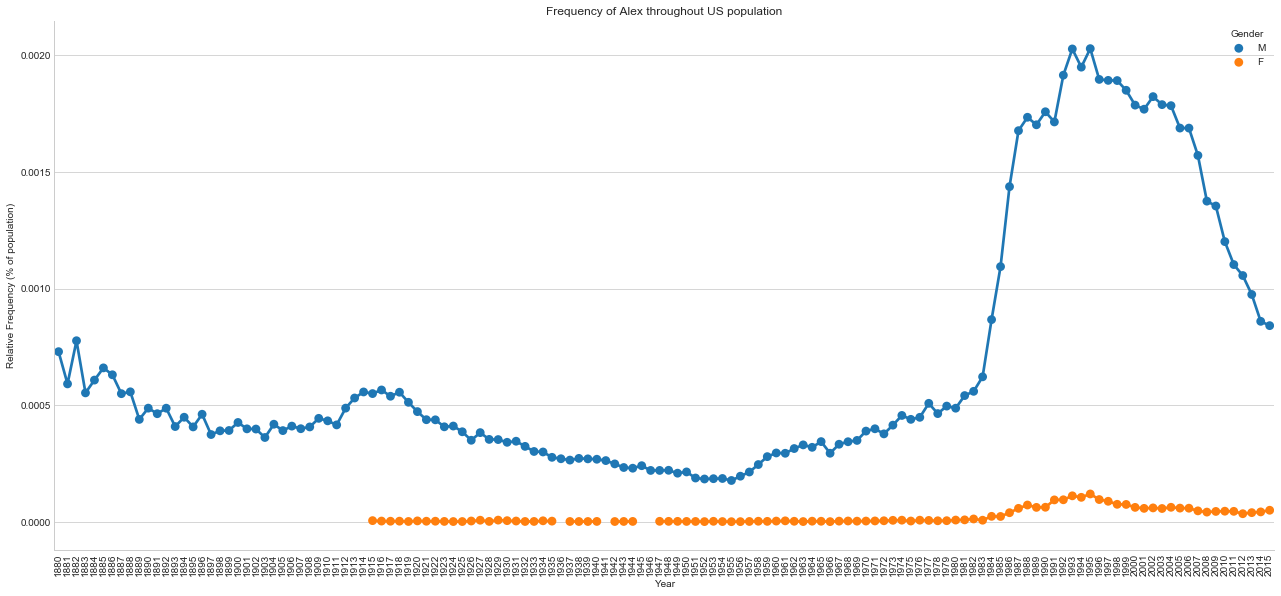

In [11]:
name = 'Alex'
data = get_every_year_frequency(name, relative=True)
plot_frequency_data(data, name, relative=True)

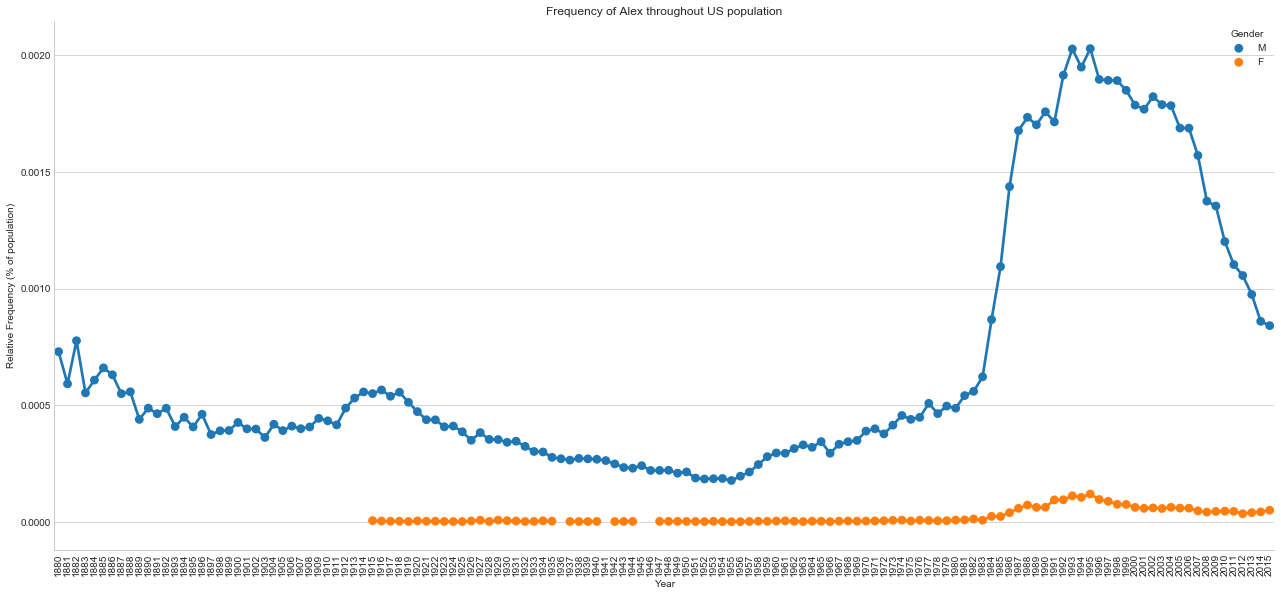

In [7]:
name = 'Alex'
data = get_every_year_frequency(name, relative=True)
plot_frequency_data(data, name, relative=True)

In [11]:
out=find_more_popular()
print(len(out))

male/F counts:
        Name Gender  Number  Year  diff
0       Mary      F    7065  1880 -7065
1       Anna      F    2604  1880 -2604
2       Emma      F    2003  1880 -2003
3  Elizabeth      F    1939  1880 -1939
4     Minnie      F    1746  1880 -1746
group on name,yr:
            Number  diff
Name  Year              
Aaban 2007       5     5
      2009       6     6
      2010       9     9
      2011      11    11
      2012      11    11
yr drop:
    Name  Number  diff
0  Aaban       5     5
1  Aaban       6     6
2  Aaban       9     9
3  Aaban      11    11
4  Aaban      11    11
min/max:
          diff    
           min max
Name              
Aaban        5  16
Aabha       -9  -5
Aabid        5   5
Aabriella   -5  -5
Aada        -5  -5
min/max:
           min  max
Name               
Aaban        5   16
Aabha       -9   -5
Aabid        5    5
Aabriella   -5   -5
Aada        -5   -5
switch column:
           min  max  switch
Name                       
Aaban        5   16   Fa

['Aalijah' 'Aamari' 'Aaren' 'Aareon' 'Aari' 'Aarian' 'Aarin' 'Aaris'
 'Aarya' 'Aaryn' 'Aavyn' 'Aba' 'Abba' 'Abbey' 'Abell' 'Abey' 'Abie'
 'Abijah' 'Abimbola' 'Abiola' 'Abir' 'Abishai' 'Abiyah' 'Abney' 'Abrar'
 'Abraxas' 'Abrian' 'Abriel' 'Aby' 'Abyan' 'Acelin' 'Acey' 'Acy' 'Adair'
 'Adali' 'Adama' 'Adar' 'Adason' 'Addington' 'Addis' 'Addison' 'Adean'
 'Adebola' 'Adel' 'Adell' 'Adeyinka' 'Adgie' 'Adi' 'Adie' 'Adis' 'Adisa'
 'Adison' 'Adley' 'Admire' 'Adna' 'Adonai' 'Adoniah' 'Adraine' 'Adrean'
 'Adriann' 'Adrien' 'Adrienn' 'Adrin' 'Adrine' 'Adryan' 'Adryn' 'Adyn'
 'Aeon' 'Aerion' 'Aeron' 'Afsheen' 'Afton' 'Agam' 'Agape' 'Ah' 'Ahmari'
 'Aideen' 'Aidyn' 'Aidynn' 'Aijalon' 'Aiman' 'Aimar' 'Aime' 'Aimen'
 'Ainsley' 'Airen' 'Aireon' 'Aires' 'Airin' 'Airon' 'Aivan' 'Ajae' 'Ajai'
 'Ajalon' 'Ajene' 'Akai' 'Aki' 'Akida' 'Akie' 'Akili']


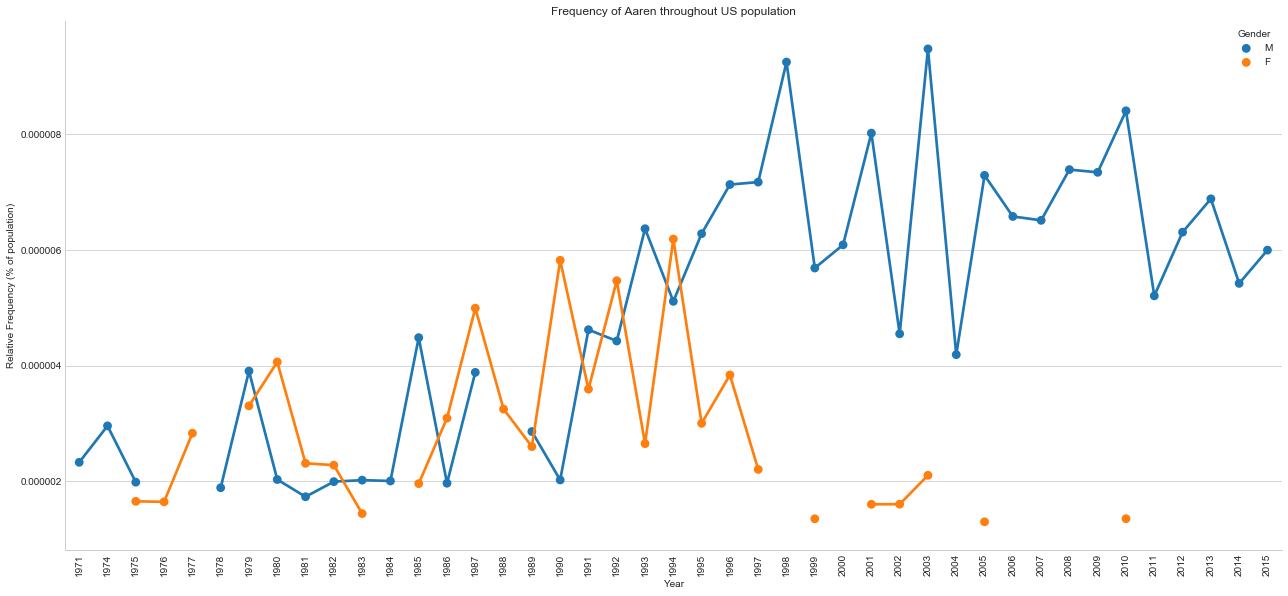

In [12]:
print find_more_popular()[0:100] #print first 100 names

name = 'Aaren'
data = get_every_year_frequency(name, relative=True)
plot_frequency_data(data, name, relative=True)

## Problem 5
Include an interaction term
Specifically: load the kidiq data set into a data frame, figure out how to add an interaction term, and then solve the resulting linear regression now with three features (three covariates), namely, mom_iq, mom_hs, and mom_hs * mom_iq


Explain what you see, and how it relates to the graph you obtain before
adding the interaction term. That is, use plots / visualization, to argue convincingly that the
interaction term should or shouldn’t be there, and then tell us what this means.

In [31]:
df = pd.read_stata('./child.iq/kidiq.dta')
    
X = df[['mom_iq', 'mom_hs']]
Y = df[['kid_score']]
lr_without_interaction = LinearRegression()
lr_without_interaction.fit(X,Y)
print (lr_without_interaction.coef_, lr_without_interaction.intercept_)
lr_without_interaction.coef_ = lr_without_interaction.coef_[0]

df['interaction_feature'] = df['mom_hs'] * df['mom_iq']

X_new = df[['mom_iq', 'mom_hs', 'interaction_feature']]
lr_with_interaction = LinearRegression()
lr_with_interaction.fit(X_new,Y)
lr_with_interaction.coef_ = lr_with_interaction.coef_[0]
print (lr_with_interaction.coef_, lr_with_interaction.intercept_)


lr_without_interaction.score(X,Y), lr_with_interaction.score(X_new,Y)

[[0.56390605 5.95011691]] [25.73153818]
[ 0.96888921 51.26822343 -0.48427467] [-11.48202114]


(0.21414651708983581, 0.23010362792143813)

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


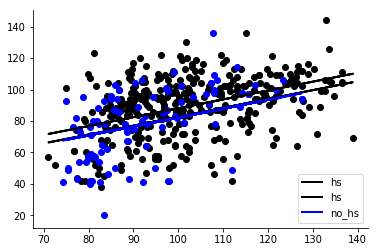

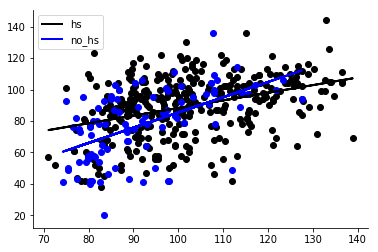

In [30]:
kidiq_hs = df[df.mom_hs==1]
kidiq_nohs = df[df.mom_hs==0]
X_hs = kidiq_hs.as_matrix(["mom_iq"])
Y_hs = kidiq_hs.as_matrix(["kid_score"])
X_nohs = kidiq_nohs.as_matrix(["mom_iq"])
Y_nohs = kidiq_nohs.as_matrix(["kid_score"])


plt.scatter(X_hs, Y_hs,  color='black')
plt.scatter(X_nohs, Y_nohs,  color='blue')
plt.plot(X_hs, lr_without_interaction.intercept_+lr_without_interaction.coef_[0]*X_hs + lr_without_interaction.coef_, color='black', linewidth=2, label = 'hs')
plt.plot(X_nohs, lr_without_interaction.intercept_+lr_without_interaction.coef_[0]*X_nohs, color='blue', linewidth=2, label = 'no_hs')
sns.despine()
plt.legend()

plt.show()

plt.scatter(X_hs, Y_hs,  color='black')
plt.scatter(X_nohs, Y_nohs,  color='blue')
plt.plot(X_hs, lr_with_interaction.intercept_+lr_with_interaction.coef_[1]+(lr_with_interaction.coef_[0]+lr_with_interaction.coef_[2])*X_hs, color='black', linewidth=2, label = 'hs')
plt.plot(X_nohs, lr_with_interaction.intercept_+lr_with_interaction.coef_[0]*X_nohs, color='blue', linewidth=2, label = 'no_hs')
sns.despine()
plt.legend()


**Answer** 

Greater $R^2$ value suggests a better goodness of fit. This is not sufficient to state that the interaction term is useful. The presence of a significant interaction should show effect of one feature variable on the response
variable varies at different values of the other feature variable. The change in slope is different in both scenarios with the interaction term added.  The impact of moms' HS status is less on kids' scores when they went to HS than wen they didn't. So it can be argued that kids with moms with greater IQ but without HS training have higher scores. 


## Problem 6

**Visualization Tools and Missing/Hidden Values.**

Visualization is important both forexploring the data, as well as for explaining what you have done.  There are a huge number of such tools now available.  This exercise walks through various functionalities of matplotlib and pandas.

•The first part of this exercise was created by Dataquest.  Run through the commands given in this tutorial:  https://www.dataquest.io/blog/matplotlib-tutorial/ and under-stand the code.

•Suppose that you would now like to plot some of the results by state.  As you will see,the state information is sometimes missing, and other times it comes in varying forms. Figure out how to aggregate the results by state.  The challenge here:  how many of thetweets can you (correctly) assign to a state?  Note: depending on how well you want todo (i.e., how many tweets you want to correctly assign to their state), this is not an easy problem!

**Answer**


Follow through the excercise step by step for the first part.

For the second part you can do this in many different ways. The simplest way is too just hardcode it and look for every possible spelling of each state (e.g. TX, Texas, texas, austin, Austin, Dallas, houston, etc.). Of course doing this for the most populus states first, and then just hardcoding (or even ignoring) the state names for smaller states will get you the most results for your effort.

There are of course much more advanced ways of predicting the state. This could include just using the user location (as done above), but also using the actual tweet content and other variables. A classification model can be created to predict which of the 50 states the user most likely belongs. You could even create an advanced deep learning model to read through the text and user location word by word.

Of course building a simple parser that looks through several of the most popular states is plenty for the purposes of this question.

## Problem 7

**More Visualization Tools – Optional.**

This exercise was also created by Dataquest.  Run through the exercise https://www.dataquest.io/blog/python-data-visualization-libraries/for more visualization tools, including some that allow you to plot points on a map, and also to create interactive maps (zoom in, etc.).

**Answer**

Follow through the excercise step by step.

## Written Questions

## Problem 1

**Standard Error:**

It  is  important  to  develop  an  intuition  for  how  much  error  we  should “expect” when we solve a particular statistical problem. As the number of sample increase, we should expect the error to decrease. But by how much? In the first lab, you generated samples from a univariate (Problem 3) and multivariate (Problem 4) Gaussian with given parameters,and then you were asked to estimate those parameters from the data you generated.  In thisexercise,  we  derive  explicitly  the  relationship  that you (should  have) observed  doing  those exercises. Suppose $Z\sim N(μ,σ^2)$, i.e., $Z$ is a univariate Gaussian (a.k.a. normal) random variable with mean $μ$ and variance $σ^2$.  Suppose that you see $n$ samples from $Z$, i.e., you see data $z_{1},...,z_{n}$. Let $z_{avg}=\sum_{i=1}^{n}{\frac{z_{i}}{n}}$ denote the sample mean.  We want to answer:  how close is $z_{avg}$ to $μ$? Note that $z_{avg}$ is a random variable so we need to quantify in a probabilistic way how close $z_{avg}$ is to $μ$.

•Suppose $Z\sim N(0,1)$.   This  is  also  called  a standard  normal  random  variable. For $n = 10,000$, compute the probability that $z_{avg}>0.1$, $z_{avg}>0.01$, and $z_{avg}>0.001$.

•Now for the general case:  suppose $Z\sim N(μ,σ^2)$, and for general $n$, compute the probability that $z_{avg}−μ > n−\frac{1}{3}$, $z_{avg}−μ > n−\frac{1}{2}$, and $z_{avg}−μ > n−\frac{2}{3}$. For your calculations, you can let $n$ scale if that makes things easier.

**Answer**

$\mathbb{P}(z_{avg} > z) = \mathbb{P}(\frac{\sqrt{n}(z_{avg} - \mu)}{\sigma} > \frac{\sqrt{n}(z - \mu)}{\sigma})$

$\mathbb{P}(z_{avg} > 0.1) = \mathbb{P}(\sqrt{10,000}(z_{avg}) > \sqrt{10,000}(0.1)) = 1-\Phi(10) \sim 0 $
$\mathbb{P}(z_{avg} > 0.01) = \mathbb{P}(\sqrt{10,000}(z_{avg}) > \sqrt{10,000}(0.01)) = 1-\Phi(1) \sim 0.1587 $
$\mathbb{P}(z_{avg} > 0.001) = \mathbb{P}(\sqrt{10,000}(z_{avg}) > \sqrt{10,000}(0.001)) = 1-\Phi(0.1) \sim 0.4602 $

$\mathbb{P}(z_{avg} - \mu > n^{-p}) = \mathbb{P}(\frac{\sqrt{n}(z_{avg} - \mu)}{\sigma} > \frac{\sqrt{n}(n^{-p}}{\sigma}) = 1 - \Phi(\frac{n^{\frac{1}{2}-p})}{\sigma})$

We see that if the error allowed is $\gg n^{-\frac{1}{2}}$ then we are very likely to achieve this error tolerance for large $n$. If the error allowed is $\ll n^{-\frac{1}{2}}$ then we are very unlikely to achieve this error tolerance for large $n$. If the error allowed is $\sim n^{-\frac{1}{2}}$ then we will achive this error tolerance with some constant probability

Note below that $1/2$ is the most likely probability, due to symmetry. Multiply by 2 to get the 2-sided tails.

$\mathbb{P}(z_{avg} - \mu > n^{\frac{1}{3}}) = 1 - \Phi(\frac{n^{\frac{1}{6}}}{\sigma}) \to 0$


$\mathbb{P}(z_{avg} - \mu > n^{-\frac{1}{2}}) =  1 - \Phi(\frac{1}{\sigma}) \to \text{constant value below 1/2}$

$\mathbb{P}(z_{avg} - \mu > n^{\frac{2}{3}}) = 1 - \Phi(\frac{n^{-\frac{1}{6}}}{\sigma}) \to 1/2$

## Problem 2

More Standard Error

Consider a one dimensional regression problem, where the offset is zero.  Thus, we are trying to fit a function of the form $h(x) = x·β$.  Suppose that the truth is a noisy version of this – that is, the true model according to which data are generated is: $$y_{i}=x_{i}·β+e_{i}$$. Everything in the above equation is a scalar, i.e. $y_{i}, x_{i}, β, e_{i}∈\mathbb{
R}$.  Here, $e_{i}$ represents independent noise that is not modeled by the linear relationship.

 
•When we have $n$ data points, the least squares objective reads: $$\min_{β}:\frac{1}{n}\sum_{i=1}^{n}{(x_{i}β−y_{i})^2}$$. Show that this is a quadratic function in $β$, that is, if we expand it, it has the form $$Aβ^2+Bβ+C$$.
 
•Compute $A,B$, and $C$ explicity, i.e., as explicit functions of the data, ${x_{i},y_{i}}$.  Note that these should not be functions of $β$.  Show that $A≥0$ regardless of the values of the data.


•Since $A≥0$, this is a quadratic function whose graph opens up.  This means that it is convex, and therefore the solution is characterized as the solution obtained by setting the first derivative (w.r.t. $β$) equal to zero.  Do this, and therefore explicitly solve for the solution $\hat{β}$.  This is the one-dimensional form of what is known as the normal equations. Hint:  we did this problem in class.

/
•Now  using  the  one  dimensional  expression  from  the  second  part,  and  plugging  in  the relationship $y_{i}=x_{i}·β+e_{i}$, write $$\hat{β}=β+Ze$$ where $e$ denotes the vector of all the errors, $e_{i}$, added in each stage, and where $Z$ is a matrix of appropriate dimension.  What is $Z$, explicitly?


(Bonus)  Repeat the last two questions in the general case.  That is, derive the normal equations and the standard error for the general (vector) case, where our model is $$y_{i}=x_{i}^Tβ+e_{i}$$ where now $x_{i}, β∈\mathbb{R}$, and $x_{i}^Tβ$ denotes the dot product.

**Answer**

$\frac{1}{n}\sum_{i=1}^{n}(x_{i}\beta - y_{i})^2 = \frac{1}{n}\beta^2\sum_{i=1}^{n}{x_{i}^2} - 2\beta\sum_{i=1}^{n}{x_{i}y_{i}} + \sum_{i=1}^{n}{y_{i}^2} = \frac{x^Tx}{n}\beta^2 - 2\frac{x^Ty}{n}\beta + \frac{y^Ty}{n}$

$$A = \frac{1}{n}\sum_{i=1}^{n}x_i^2$$

$$B = \frac{-2}{n}\sum_{i=1}^{n}x_iy_i$$

$$C = \frac{1}{n}\sum_{i=1}^{n}y_i^2$$

Since A is a sum of square terms, it will be positive no matter what value the data takes.

$\frac{\partial}{\partial\beta}A\beta^2 + B\beta + C = 2A\beta + B$


$\frac{\partial}{\partial\beta} = 0 \to \ \hat{\beta}= \frac{-B}{2A} = \frac{\frac{-2}{n}\sum_{i=1}^{n}x_iy_i}{\frac{2}{n}\sum_{i=1}^{n}x_i^2} = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i=1}^{n}x_i^2}$


$\hat{\beta} = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i=1}^{n}x_i^2} = \frac{\sum_{i=1}^{n}x_i(x_i\beta+e_i)}{\sum_{i=1}^{n}x_i^2} = \frac{\sum_{i=1}^{n}x_i^2\beta+x_ie_i}{\sum_{i=1}^{n}x_i^2} = \beta + \frac{\sum_{i=1}^{n}x_ie_i}{\sum_{i=1}^{n}x_i^2}$

$\hat{\beta} = \beta + Ze$ 

$Z = \frac{x^T}{\sum_{i=1}^{n}x_i^2}$

$Z$ is the dataset $x$ scaled by the variance.

In the general case with a matrix x, $\hat{\beta} = \frac{x^Ty}{x^Tx} = \beta + (x^Tx)^{-1}x^Te$